Importing the required libraries, then downloading and loading the dataset which is in csv file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
upload = files.upload()

Saving LoanApprovalPrediction.csv to LoanApprovalPrediction.csv


In [ ]:
data = pd.read_csv('LoanApprovalPrediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print("The number of rows are ", data.shape[0])
print("The number of columns are ", data.shape[1])

The number of rows are  598
The number of columns are  13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Data Preprocessing: Treating the Missing Values

In [ ]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].dropna().mode().values[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].dropna().mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].dropna().mode().values[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].dropna().mode().values[0])

# Removing the column which is not correlated to any other columns
data = data.drop('Loan_ID', axis=1)

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

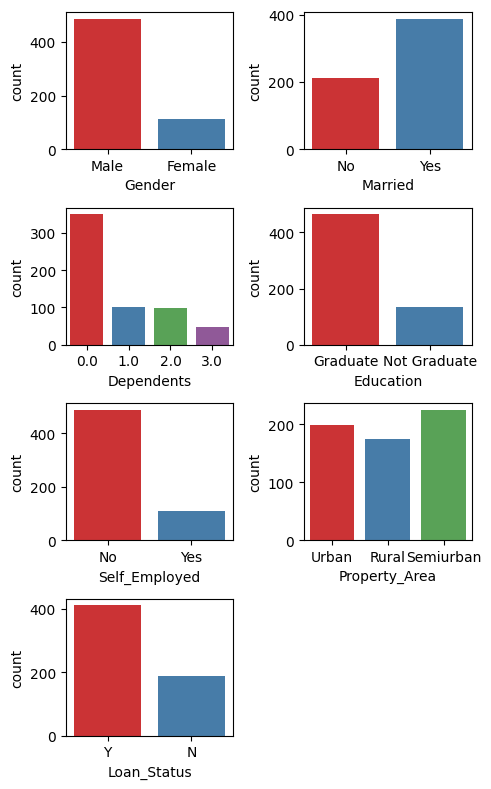

In [ ]:
# Data Visualisation
plt.figure(figsize=(5, 8))
plt.subplot(4,2,1)
sns.countplot(x = 'Gender', data=data, palette='Set1')
plt.subplot(4,2,2)
sns.countplot(x = 'Married', data=data, palette='Set1')
plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', data=data, palette='Set1')
plt.subplot(4,2,4)
sns.countplot(x = 'Education', data=data, palette='Set1')
plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', data=data, palette='Set1')
plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', data=data, palette='Set1')
plt.subplot(4,2,7)
sns.countplot(x = 'Loan_Status', data=data, palette='Set1')
plt.tight_layout()
plt.show()

Data Preprocessing: Handling the Categorical Columns

In [ ]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1, 'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0}).astype('int')
data = pd.get_dummies(data, columns =['Dependents', 'Property_Area'])
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,144.968804,360.0,1.0,1,1,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,0,1


Feature Scaling

In [ ]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
sc = StandardScaler()
data[cols] = sc.fit_transform(data[cols])
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0.095951,-0.552892,-1.154872e-16,0.274031,1.0,1,1,0,0,0,0,0,1
1,1,1,1,0,-0.122234,-0.041852,-2.090562e-01,0.274031,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,-0.395052,-0.552892,-9.728983e-01,0.274031,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,-0.466919,0.246201,-3.076165e-01,0.274031,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,0.121975,-0.552892,-4.889580e-02,0.274031,1.0,1,1,0,0,0,0,0,1


Creating Train and Test Dataset

In [ ]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (478, 16), y_train: (478,)
Testing dataset shape, X_test: (120, 16), y_test: (120,)


Creating Function to Return Error Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [ ]:
# We use GridSearchCV to search over specified parameter values of the model.
from sklearn.model_selection import GridSearchCV

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(3, 1)

In [ ]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

,train,test
accuracy,0.805439,0.816667
precision,0.786241,0.800000
recall,0.981595,0.988235
f1,0.873124,0.884211


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)
search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.8138815789473683

In [ ]:
best_params = search.best_params_
print(f'Bestparameters: {best_params}')

y_train_pred1 = search.predict(X_train)
y_test_pred1 = model.predict(X_test)
train_test_search_error = pd.concat([measure_error(y_train, y_train_pred1, 'train'),
                                 measure_error(y_test, y_test_pred1, 'test')],
                                axis=1)
train_test_search_error

Bestparameters: {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 27}


,train,test
accuracy,0.859833,0.816667
precision,0.831202,0.805825
recall,0.996933,0.976471
f1,0.906555,0.882979


Support Metrics Classifier

In [ ]:
from sklearn.svm import SVC
model = SVC()
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}
grid_search1 = GridSearchCV(estimator = model,
                           param_grid = params_grid,
                           scoring='f1',
                           cv = 5, verbose = 1)

grid_search1.fit(X_train, y_train.values.ravel())
best_params = grid_search1.best_params_
best_params

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'C': 1, 'kernel': 'rbf'}

In [ ]:
model = SVC(C=1, kernel='rbf')
model.fit(X_train, y_train.values.ravel())
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

train_test_model_error = pd.concat([measure_error(y_train, y_train_preds, 'train'),
                                 measure_error(y_test, y_test_preds, 'test')],
                                axis=1)
train_test_model_error

,train,test
accuracy,0.826360,0.816667
precision,0.802993,0.805825
recall,0.987730,0.976471
f1,0.885832,0.882979
